In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df_raw = pd.read_csv('data/bank.csv')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


- 결측치 처리

In [4]:
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

C:\Users\User\AppData\Local\Temp/ipykernel_8736/670386109.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(), inplace = True)


In [6]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
df_train, df_test = train_test_split(df_raw_dummy, test_size= 0.2, random_state=1234)
print('학습용 데이터의 크기: {}'.format(df_train.shape))
print('평가용 데이터의 크기: {}'.format(df_test.shape))

학습용 데이터의 크기: (2998, 19)
평가용 데이터의 크기: (750, 19)


In [8]:
df_train_y = df_train['BAD']
df_train_x = df_train.drop(columns = 'BAD', inplace = False)
df_test_y = df_test['BAD']
df_test_x = df_test.drop(columns = 'BAD', inplace = False)

- 기본 옵션으로 트리 생성

In [9]:
tree_uncostomized = DecisionTreeClassifier(random_state=1234)
tree_uncostomized.fit(df_train_x, df_train_y)

print('학습용 데이터의 정확도 {:.3f}'.format(tree_uncostomized.score(df_train_x, df_train_y)))
print('평가용 데이터의 정확도 {:.3f}'.format(tree_uncostomized.score(df_test_x, df_test_y)))

학습용 데이터의 정확도 1.000
평가용 데이터의 정확도 0.937


- 모델 파라미터 조정 Manual Search  
    max_depth

In [10]:
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

df_accuracy_depth.round(3)
    
    

,Depth,TrainAccuracy,TestAccuracy
0,1,0.926,0.925
1,2,0.931,0.927
2,3,0.933,0.920
3,4,0.936,0.929
4,5,0.938,0.935
5,6,0.942,0.932
6,7,0.947,0.933
7,8,0.951,0.935
8,9,0.956,0.936
9,10,0.960,0.935


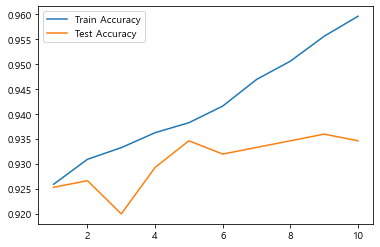

In [11]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.legend()

- depth 5로 골라보자

In [13]:
v_feature_name = df_train_x.columns

# depth 5
tree_5 = DecisionTreeClassifier(max_depth = 5, random_state = 1234)
tree_5.fit(df_train_x, df_train_y)

tree_5_pred = tree_5.predict(df_test_x)
# tree_5.predict_proba(df_test_x) 라고 하면 예측값이 확률값으로 들어옴, 그러면 파라미터 조정 가능

In [15]:
print('Classification Report: Depth = 5\n\n', classification_report(df_test_y, tree_5_pred))

Classification Report: Depth = 5

               precision    recall  f1-score   support

           0       0.93      1.00      0.97       684
           1       1.00      0.26      0.41        66

    accuracy                           0.93       750
   macro avg       0.97      0.63      0.69       750
weighted avg       0.94      0.93      0.92       750



In [16]:
tree_5.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

- min sample leaf

In [27]:
#학습용 및 평가용 설명력 결과 저장
train_score = []
test_score = []

# min samples leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 5, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.938,0.935
1,2,0.938,0.935
2,3,0.938,0.935
3,4,0.938,0.935
4,5,0.938,0.935
5,6,0.937,0.932
6,7,0.937,0.932
7,8,0.937,0.932
8,9,0.937,0.932
9,10,0.937,0.932


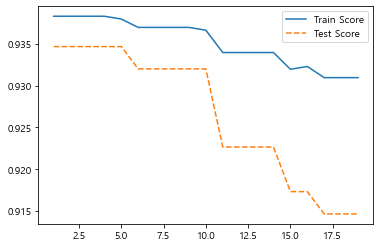

In [28]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

In [37]:
tree_510 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=5, min_samples_split= 10, random_state = 1234)
tree_510.fit(df_train_x, df_train_y)

tree_510_pred = tree_510.predict(df_test_x)

In [38]:
print('Classification Report: Depth = 5\n\n', classification_report(df_test_y, tree_510_pred))

Classification Report: Depth = 5

               precision    recall  f1-score   support

           0       0.93      1.00      0.97       684
           1       1.00      0.26      0.41        66

    accuracy                           0.93       750
   macro avg       0.97      0.63      0.69       750
weighted avg       0.94      0.93      0.92       750



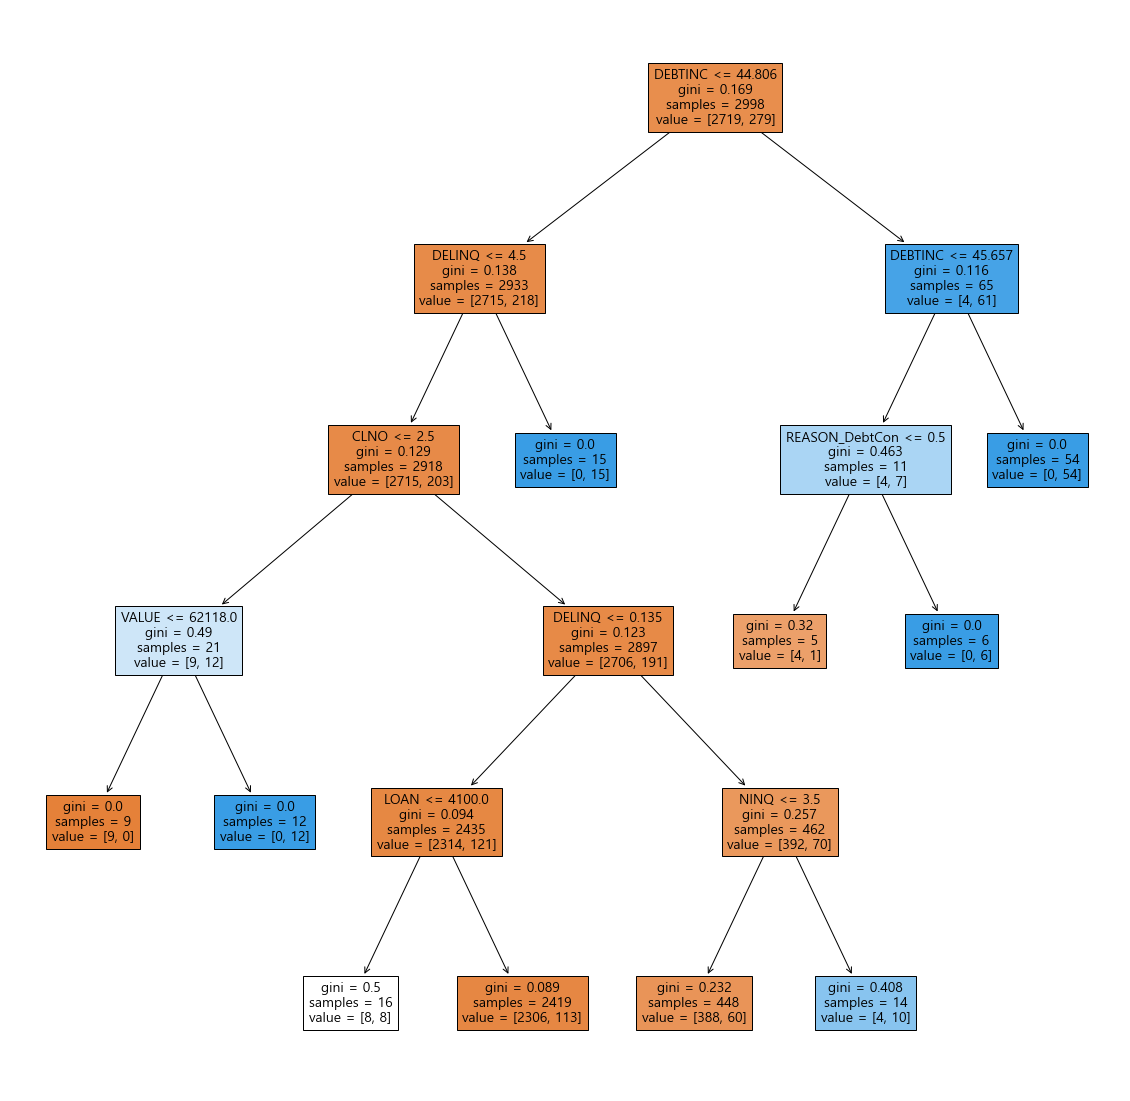

In [41]:
plt.figure(figsize = (20, 20))
plot_tree(tree_510, feature_names=v_feature_name, filled = True);

- GridSearch

In [48]:
para_split = list(range(10, 110, 10))
para_split

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [44]:
estimator = DecisionTreeClassifier()

param_grid = {'max_depth': para_depth, 'min_samples_split': para_split, 'min_samples_leaf': para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'f1', n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

best score: 
0.581


In [75]:
tree_grid = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=2, min_samples_split= 10, random_state = 1234)
tree_grid.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=1234)

In [76]:
tree_grid_pred = tree_grid.predict(df_test_x)

In [77]:
print('Classification Report: Grid\n\n', classification_report(df_test_y, tree_grid_pred))

Classification Report: Grid

               precision    recall  f1-score   support

           0       0.94      0.99      0.97       684
           1       0.79      0.35      0.48        66

    accuracy                           0.93       750
   macro avg       0.87      0.67      0.72       750
weighted avg       0.93      0.93      0.92       750



In [58]:
from sklearn.metrics import accuracy_score

In [60]:
print('평가용 데이터의 정확도: {:.3f}'.format(accuracy_score(df_test_y,grid_dt_pred)))

평가용 데이터의 정확도: 0.936


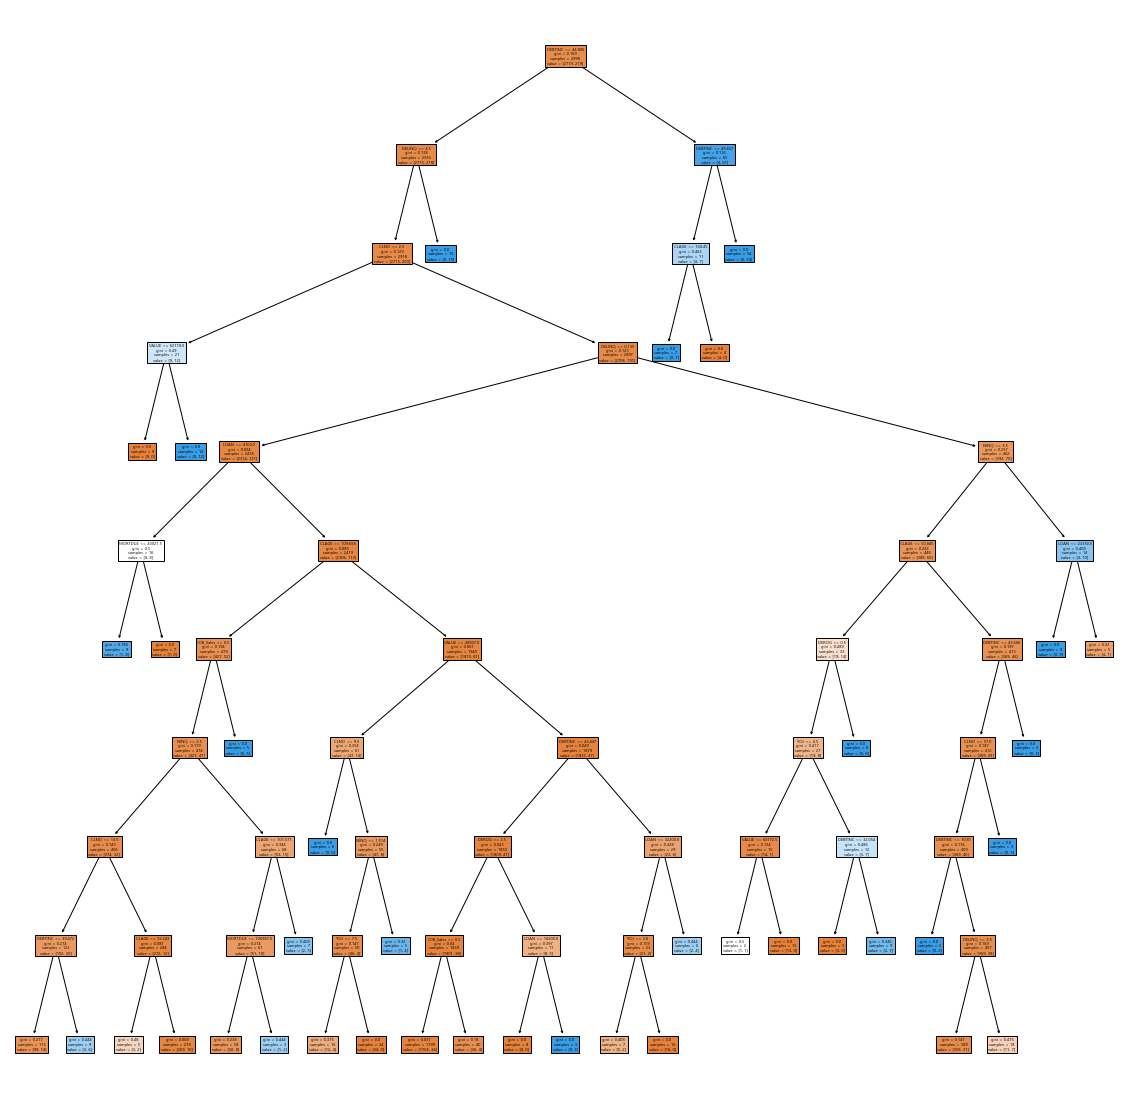

In [79]:
plt.figure(figsize = (20, 20))
plot_tree(tree_grid, feature_names=v_feature_name, filled = True);

# 실습

In [80]:
df_tel = pd.read_csv('data/tele_customer.csv')
df_tel.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [81]:
df_tel.shape

(930, 15)

In [7]:
df_train, df_test = train_test_split(df_tel_dummy, test_size= 0.2, random_state=1234)
print('학습용 데이터의 크기: {}'.format(df_train.shape))
print('평가용 데이터의 크기: {}'.format(df_test.shape))

학습용 데이터의 크기: (2998, 19)
평가용 데이터의 크기: (750, 19)


In [8]:
df_train_y = df_train['BAD']
df_train_x = df_train.drop(columns = 'BAD', inplace = False)
df_test_y = df_test['BAD']
df_test_x = df_test.drop(columns = 'BAD', inplace = False)

In [48]:
para_split = list(range(10, 110, 10))
para_split

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [44]:
estimator = DecisionTreeClassifier()

param_grid = {'max_depth': para_depth, 'min_samples_split': para_split, 'min_samples_leaf': para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

best score: 
0.581


In [75]:
tree_grid = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=2, min_samples_split= 10, random_state = 1234)
tree_grid.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=1234)

In [76]:
tree_grid_pred = tree_grid.predict(df_test_x)

In [77]:
print('Classification Report: Grid\n\n', classification_report(df_test_y, tree_grid_pred))

Classification Report: Grid

               precision    recall  f1-score   support

           0       0.94      0.99      0.97       684
           1       0.79      0.35      0.48        66

    accuracy                           0.93       750
   macro avg       0.87      0.67      0.72       750
weighted avg       0.93      0.93      0.92       750

